In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
from sklearn.preprocessing import LabelEncoder

# load data
df = pd.read_csv('house-prices.csv', sep=r'\s+')



In [3]:
# preprocessing
print(df.describe())
print("\n")

               Price         SqFt    Bedrooms   Bathrooms      Offers
count     128.000000   126.000000  125.000000  127.000000  126.000000
mean   130427.343750  2001.666667    3.032000    2.448819    2.563492
std     26868.770371   212.387382    0.728852    0.514992    1.069550
min     69100.000000  1450.000000    2.000000    2.000000    1.000000
25%    111325.000000  1882.500000    3.000000    2.000000    2.000000
50%    125950.000000  2000.000000    3.000000    2.000000    3.000000
75%    148250.000000  2140.000000    3.000000    3.000000    3.000000
max    211200.000000  2590.000000    5.000000    4.000000    6.000000




In [36]:
print(df.info())
print("\n")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128 entries, 0 to 127
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Price         128 non-null    int64  
 1   SqFt          126 non-null    float64
 2   Bedrooms      125 non-null    float64
 3   Bathrooms     127 non-null    float64
 4   Offers        126 non-null    float64
 5   Brick         128 non-null    object 
 6   Neighborhood  128 non-null    object 
dtypes: float64(4), int64(1), object(2)
memory usage: 7.1+ KB
None




In [4]:
# preprocessing
# replacing non values with mean or median
print(f" before filling non values : {df.isna().sum()}")
df[[ "SqFt"]] = df[[ "SqFt"]].apply(lambda x: x.fillna(x.mean()), axis=0)
df[["Bedrooms", "Bathrooms","Offers"]] = df[["Bedrooms", "Bathrooms","Offers"]].apply(lambda x: x.fillna(x.median()), axis=0)
print(f" After  filling non values : {df.isna().sum()}")

 before filling non values : Price           0
SqFt            2
Bedrooms        3
Bathrooms       1
Offers          2
Brick           0
Neighborhood    0
dtype: int64
 After  filling non values : Price           0
SqFt            0
Bedrooms        0
Bathrooms       0
Offers          0
Brick           0
Neighborhood    0
dtype: int64


In [17]:
# seperate train and test data
X = df[['SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick', 'Neighborhood']]
y = df['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [5]:
def detect_outliers_iqr(df, numeric_columns):
    outliers = {}

    for col in numeric_columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers[col] = df[(df[col] < lower_bound) | (df[col] > upper_bound)]

    return outliers



numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns
outliers_iqr = detect_outliers_iqr(df, numeric_columns)
for col, outlier_data in outliers_iqr.items():
    if not outlier_data.empty:
        print(f"Outliers in {col} based on IQR:")
        print(outlier_data)
    else:
        print(f"No outliers in {col} based on IQR")


Outliers in Price based on IQR:
      Price    SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
103  211200  2440.0       4.0        3.0     3.0   Yes         West
Outliers in SqFt based on IQR:
      Price    SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
14   176800  2590.0       4.0        3.0     4.0    No         West
65   111100  1450.0       2.0        2.0     1.0   Yes        North
105  146900  2530.0       4.0        3.0     4.0    No         West
Outliers in Bedrooms based on IQR:
      Price    SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
0    114300  1790.0       2.0        2.0     2.0    No         East
1    114200  2030.0       4.0        2.0     3.0    No         East
7    150700  2160.0       4.0        2.0     2.0    No         West
8    119200  2110.0       4.0        2.0     3.0    No         East
11   123000  1870.0       2.0        2.0     2.0   Yes         East
14   176800  2590.0       4.0        3.0     4.0    No         West
15   145800  1780.

In [6]:
def detect_outliers_zscore(df, numeric_columns):
    df_zscore = df.copy()
    outliers= {}

    for col in numeric_columns:
        mean = df[col].mean()
        std = df[col].std()
        df_zscore[col] = (df[col] - mean) / std

        outliers[col] = df[(df_zscore[col] > 3) | (df_zscore[col] < -3)]

    return  outliers

outliers_zscore = detect_outliers_zscore(df, numeric_columns)
for col, outlier_data in outliers_zscore.items():
    if not outlier_data.empty:
        print(f"Outliers in {col} based on Z-Score:")
        print(outlier_data)
    else:
        print(f"No outliers in {col} based on Z-Score")

Outliers in Price based on Z-Score:
      Price    SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
103  211200  2440.0       4.0        3.0     3.0   Yes         West
No outliers in SqFt based on Z-Score
No outliers in Bedrooms based on Z-Score
Outliers in Bathrooms based on Z-Score:
      Price    SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
116  199500  2290.0       5.0        4.0     1.0   Yes         West
Outliers in Offers based on Z-Score:
    Price    SqFt  Bedrooms  Bathrooms  Offers Brick Neighborhood
47  90300  2050.0       3.0        2.0     6.0    No        North


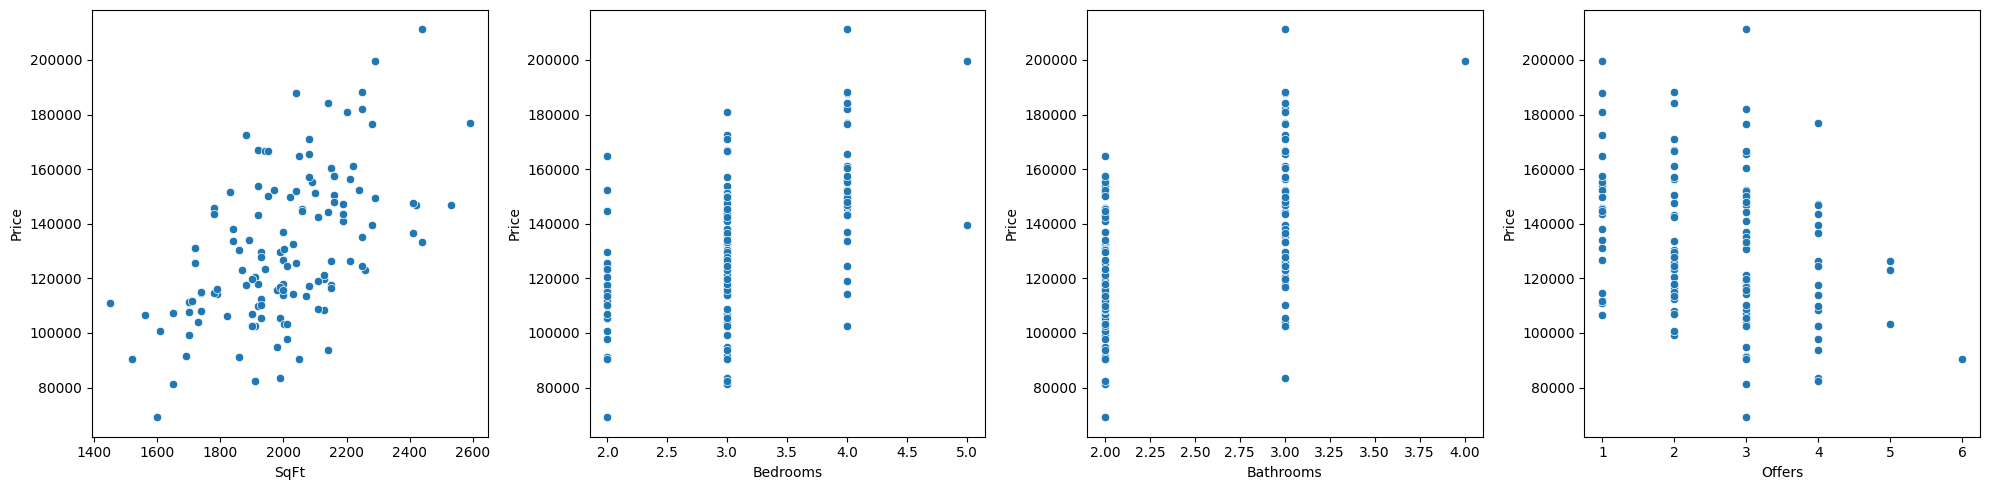

In [7]:
# showing relation between data
y_price = df["Price"]
sub_numeric_columns = [col for col in df.select_dtypes(include=["number"]).columns if col != "Price"]
# scatter
plot_num = len(sub_numeric_columns)
plt.figure(figsize=(5 * plot_num, 5))
for i, col in enumerate(sub_numeric_columns):
    plt.subplot(1, plot_num, i + 1)
    sns.scatterplot(x=df[col], y=y_price)
plt.tight_layout()
plt.show()

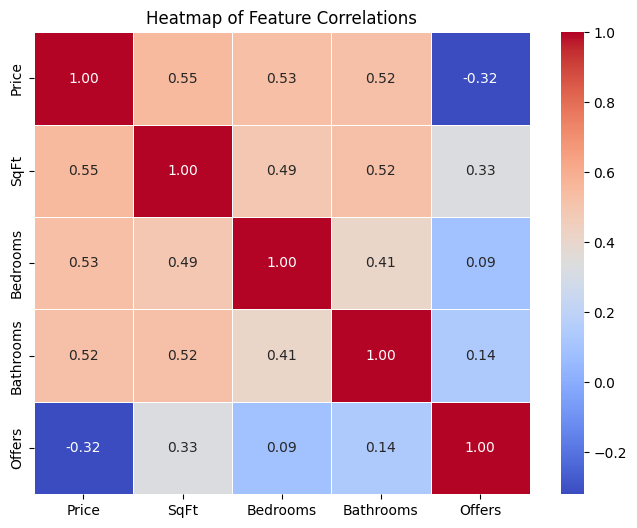

In [8]:
# heatmap
correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)

plt.title("Heatmap of Feature Correlations")
plt.show()

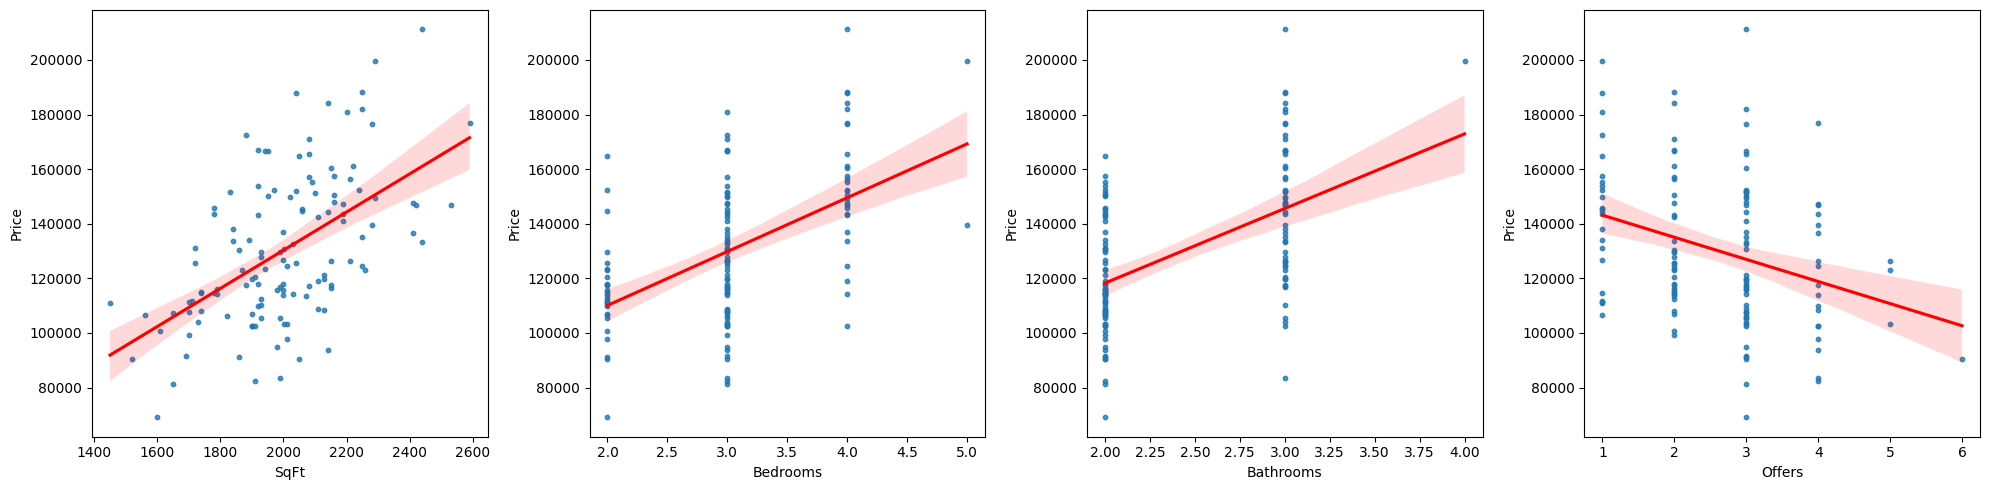

In [9]:
# regplot
plt.figure(figsize=(5 * plot_num, 5))
for i, col in enumerate(sub_numeric_columns):
    plt.subplot(1, plot_num, i + 1)
    sns.regplot(x=df[col], y=y_price, scatter_kws={"s": 10}, line_kws={"color": "red"})

plt.tight_layout()
plt.show()

In [18]:
class LinearRegression:
    def __init__(self, alpha=0.01, num_iters=1000):
        self.alpha = alpha
        self.num_iters = num_iters
        self.w = None
        self.b = None

    def normalize(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        return (X - self.mean) / self.std

    def compute_rmse(self, y_pred, y_true):
        mse = np.mean((y_pred - y_true) ** 2)
        return np.sqrt(mse)

    def compute_gradient(self, X, y):
        m = X.shape[0]
        y_pred = np.dot(X, self.w) + self.b
        error = y_pred - y
        dj_dw = np.dot(X.T, error) / m
        dj_db = np.sum(error) / m
        return dj_dw, dj_db

    def fit(self, X, y):
        X = self.normalize(X)
        m, n = X.shape
        self.w = np.zeros(n)
        self.b = 0

        self.cost_history = []

        for i in range(self.num_iters):
            dj_dw, dj_db = self.compute_gradient(X, y)
            self.w -= self.alpha * dj_dw
            self.b -= self.alpha * dj_db
            y_pred = np.dot(X, self.w) + self.b
            cost = self.compute_rmse(y_pred, y)
            self.cost_history.append(cost)

    def predict(self, X):
        X = (X - self.mean) / self.std
        return np.dot(X, self.w) + self.b

In [21]:
nonNumeric_columns = X_train.select_dtypes(include=['object', 'string']).columns

le = LabelEncoder()
for col in nonNumeric_columns:
    X_train[col] = le.fit_transform(X_train[col])
    X_test[col] = le.transform(X_test[col])
print(X_train.head())

         SqFt  Bedrooms  Bathrooms    Offers  Brick  Neighborhood
4    0.609057 -0.043390   1.078126  0.404417      0             0
96   2.080284 -0.043390   1.078126  0.404417      0             0
113 -0.007910 -0.043390  -0.865538  0.404417      1             1
36  -0.577417 -1.431876  -0.865538 -0.536772      0             1
80   0.893810 -0.043390   1.078126  1.345607      1             0


In [39]:
model = LinearRegression(alpha=0.1, num_iters=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

rmse_test = model.compute_rmse(y_pred, y_test)

print("RSME on  test", rmse_test)

RSME on  test 11212.834423196966
